# MOVIES LENS - EXPLORATORY DATA ANALYSIS

Index:

0. Importing libraries
1. Initial exploration
2. Curating the "Movies" dataset into a new csv file
3. Discovering unrepresentative ratings
4. Key statistics and graphs
5. Additional variables
6. Conclusion and steps forward

# 0. Importing Libraries

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

---

# 1. Initial Exploration

## MOVIES

Only movies with at least one rating or tag are included in the dataset.

In [14]:
movies_df = pd.read_csv('../../dataset/MovieLens_files/movies.csv')

In [15]:
movies_df.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

## RATINGS

In [16]:
ratings_df = pd.read_csv('../../dataset/MovieLens_files/ratings.csv')

In [17]:
ratings_df.head()

userId  movieId  rating   timestamp
0       1        2     3.5  1112486027
1       1       29     3.5  1112484676
2       1       32     3.5  1112484819
3       1       47     3.5  1112484727
4       1       50     3.5  1112484580

## TAGS

In [18]:
tags_df = pd.read_csv('../../dataset/MovieLens_files/tags.csv')

In [19]:
tags_df.head()

userId  movieId            tag   timestamp
0      18     4141    Mark Waters  1240597180
1      65      208      dark hero  1368150078
2      65      353      dark hero  1368150079
3      65      521  noir thriller  1368149983
4      65      592      dark hero  1368150078

## GENOME TAGS

Provides a tag ID and the corresponding tag name.

In [20]:
genome_tags_df = pd.read_csv('../../dataset/MovieLens_files/genome-tags.csv')

In [21]:
genome_tags_df.head()

tagId           tag
0      1           007
1      2  007 (series)
2      3  18th century
3      4         1920s
4      5         1930s

## GENOME SCORES

Provides the relevance of each tag, calculated based on tags, ratings, and textual reviews.

In [22]:
genome_scores_df = pd.read_csv('../../dataset/MovieLens_files/genome-scores.csv')

In [23]:
genome_scores_df.head()

movieId  tagId  relevance
0        1      1    0.02500
1        1      2    0.02500
2        1      3    0.05775
3        1      4    0.09675
4        1      5    0.14675

## LINKS

In [24]:
links_df = pd.read_csv('../../dataset/MovieLens_files/links.csv')

In [25]:
links_df.head()

movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        4  114885  31357.0
4        5  113041  11862.0

---

# 2. Curating the "Movies" dataset into a new csv file

In [26]:
movies_df.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [27]:
films_df = movies_df

films_df = films_df['title'].str.extract('(.*)\((\d{4})\)', expand=False)

In [28]:
films_df["movieId"] = movies_df['movieId']
films_df["genres"] = movies_df['genres']
films_df.columns = ['title', 'year', 'movieId', 'genres']

In [29]:
films_df = films_df[['movieId', 'title', 'year', 'genres']]
films_df.head()

movieId                         title  year  \
0        1                    Toy Story   1995   
1        2                      Jumanji   1995   
2        3             Grumpier Old Men   1995   
3        4            Waiting to Exhale   1995   
4        5  Father of the Bride Part II   1995   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [30]:
films_df.to_csv('../../dataset/MovieLens_files/movies_curated.csv')

---

# 3. Discovering unrepresentative ratings

In [31]:
ratings_df.groupby('movieId').count().head()

userId  rating  timestamp
movieId                           
1         49695   49695      49695
2         22243   22243      22243
3         12735   12735      12735
4          2756    2756       2756
5         12161   12161      12161

In [32]:
ratings_df.groupby('movieId').count().rating.quantile([0.35,0.61,0.99])

0.35        6.00
0.61       51.00
0.99    14388.69
Name: rating, dtype: float64

In [33]:
films_df[films_df['movieId']==117630]

movieId            title  year                       genres
24917   117630  Double Trouble   1992  Action|Comedy|Crime|Romance

In [34]:
films_df.describe()

movieId
count   27278.000000
mean    59855.480570
std     44429.314697
min         1.000000
25%      6931.250000
50%     68068.000000
75%    100293.250000
max    131262.000000

In [35]:
count_ratings_df = ratings_df.groupby('movieId').count()

In [36]:
count_ratings_df = count_ratings_df[count_ratings_df['rating']>50]

In [37]:
count_ratings_df.describe()

userId        rating     timestamp
count  10473.000000  10473.000000  10473.000000
mean    1894.910436   1894.910436   1894.910436
std     4706.859706   4706.859706   4706.859706
min       51.000000     51.000000     51.000000
25%      130.000000    130.000000    130.000000
50%      362.000000    362.000000    362.000000
75%     1351.000000   1351.000000   1351.000000
max    67310.000000  67310.000000  67310.000000

In [38]:
movies_id_list = count_ratings_df.index.to_list()

---

# 4. Key statistics and graphs

## Basic statistics

In [39]:
films_ratings_df = pd.merge(films_df, ratings_df, how="outer", on="movieId")

print('Rating Analysis\n', round(films_ratings_df['rating'].describe(),2)) # rating information
print('\nTag Count\n', tags_df['tag'].value_counts()) # most common tags

print('\nList of users with most ratings\n',films_ratings_df['rating'].groupby(films_ratings_df['userId']).count().sort_values(ascending=False)) # list of users with most ratings

Rating Analysis
 count    20000263.00
mean            3.53
std             1.05
min             0.50
25%             3.00
50%             3.50
75%             4.00
max             5.00
Name: rating, dtype: float64

Tag Count
 sci-fi               3384
based on a book      3281
atmospheric          2917
comedy               2779
action               2657
                     ... 
Bee Vang                1
orestis makris          1
Peter Billingsley       1
Act From                1
too frenzied            1
Name: tag, Length: 38643, dtype: int64

List of users with most ratings
 userId
118205.0    9254
8405.0      7515
82418.0     5646
121535.0    5520
125794.0    5491
            ... 
21882.0       20
68139.0       20
20578.0       20
61692.0       20
39574.0       20
Name: rating, Length: 138493, dtype: int64


In [40]:
movies_df.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

## Number of movies per 20 years

In [41]:
films_df = pd.read_csv('../../dataset/MovieLens_files/movies_curated.csv')
films_df

Unnamed: 0  movieId                         title    year  \
0               0        1                    Toy Story   1995.0   
1               1        2                      Jumanji   1995.0   
2               2        3             Grumpier Old Men   1995.0   
3               3        4            Waiting to Exhale   1995.0   
4               4        5  Father of the Bride Part II   1995.0   
...           ...      ...                           ...     ...   
27273       27273   131254        Kein Bund für's Leben   2007.0   
27274       27274   131256       Feuer, Eis & Dosenbier   2002.0   
27275       27275   131258                  The Pirates   2014.0   
27276       27276   131260                 Rentun Ruusu   2001.0   
27277       27277   131262                    Innocence   2014.0   

                                            genres  
0      Adventure|Animation|Children|Comedy|Fantasy  
1                       Adventure|Children|Fantasy  
2                                   Comedy|Romance  
3                             Comedy|Drama|Romance  
4                                           Comedy  
...                                            ...  
27273                                       Comedy  
27274                                       Comedy  
27275                                    Adventure  
27276                           (no genres listed)  
27277                     Adventure|Fantasy|Horror  

[27278 rows x 5 columns]

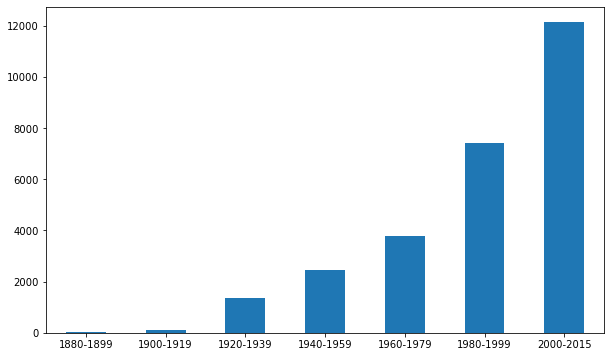

In [42]:
out = pd.cut(films_df['year'], bins=[1880, 1900, 1920, 1940, 1960, 1980, 2000, 2020], include_lowest=True)

plot = out.value_counts(sort=False).plot.bar(rot=0, figsize=(15, 8))

plot.set_xticklabels(['1880-1899', '1900-1919', '1920-1939', '1940-1959', '1960-1979', '1980-1999', '2000-2015'])

plot

In [49]:
# turning all genres into a dummy variable.

dummies = films_df['genres'].str.get_dummies(sep='|')
films_genres_df = pd.concat([films_df, dummies], axis=1)

films_genres_df.drop(columns='Unnamed: 0', inplace=True)

## Number of movies per genre

The are more films are of Drama, Comedy and Thriller

In [50]:
films_genres_df.head()

movieId                         title    year  \
0        1                    Toy Story   1995.0   
1        2                      Jumanji   1995.0   
2        3             Grumpier Old Men   1995.0   
3        4            Waiting to Exhale   1995.0   
4        5  Father of the Bride Part II   1995.0   

                                        genres  (no genres listed)  Action  \
0  Adventure|Animation|Children|Comedy|Fantasy                   0       0   
1                   Adventure|Children|Fantasy                   0       0   
2                               Comedy|Romance                   0       0   
3                         Comedy|Drama|Romance                   0       0   
4                                       Comedy                   0       0   

   Adventure  Animation  Children  Comedy  ...  Film-Noir  Horror  IMAX  \
0          1          1         1       1  ...          0       0     0   
1          1          0         1       0  ...          0       0     0   
2          0          0         0       1  ...          0       0     0   
3          0          0         0       1  ...          0       0     0   
4          0          0         0       1  ...          0       0     0   

   Musical  Mystery  Romance  Sci-Fi  Thriller  War  Western  
0        0        0        0       0         0    0        0  
1        0        0        0       0         0    0        0  
2        0        0        1       0         0    0        0  
3        0        0        1       0         0    0        0  
4        0        0        0       0         0    0        0  

[5 rows x 24 columns]

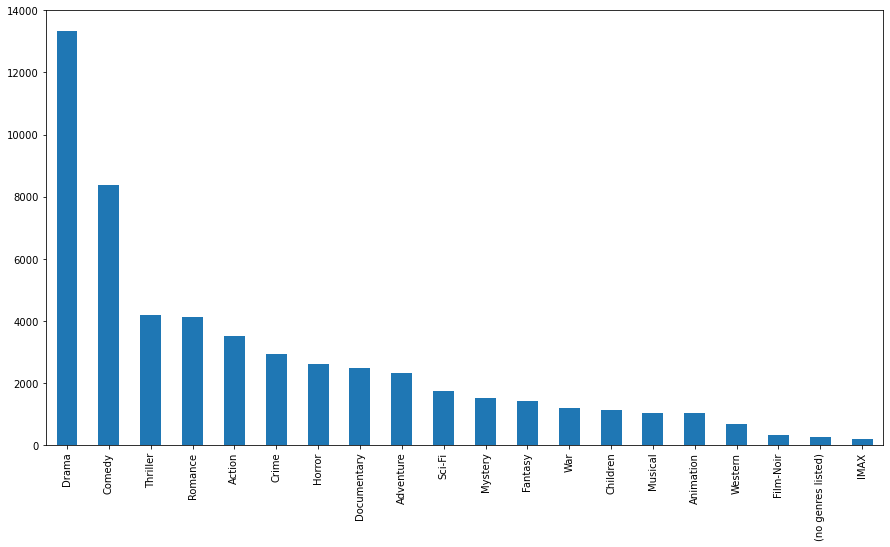

In [51]:
# Summing all genres 
films_genres_df.iloc[:, 4:].sum().sort_values(ascending=False).plot.bar(figsize=(15, 8))

## Creating a dataframe containing only movies rated more than 50 times

In [52]:
# Create column of movieId
count_ratings_df['movieId'] = count_ratings_df.index

In [53]:
mask = films_genres_df.movieId.isin(count_ratings_df.movieId)

rated_films_df = films_genres_df[mask]
rated_films_df.head()

movieId                         title    year  \
0        1                    Toy Story   1995.0   
1        2                      Jumanji   1995.0   
2        3             Grumpier Old Men   1995.0   
3        4            Waiting to Exhale   1995.0   
4        5  Father of the Bride Part II   1995.0   

                                        genres  (no genres listed)  Action  \
0  Adventure|Animation|Children|Comedy|Fantasy                   0       0   
1                   Adventure|Children|Fantasy                   0       0   
2                               Comedy|Romance                   0       0   
3                         Comedy|Drama|Romance                   0       0   
4                                       Comedy                   0       0   

   Adventure  Animation  Children  Comedy  ...  Film-Noir  Horror  IMAX  \
0          1          1         1       1  ...          0       0     0   
1          1          0         1       0  ...          0       0     0   
2          0          0         0       1  ...          0       0     0   
3          0          0         0       1  ...          0       0     0   
4          0          0         0       1  ...          0       0     0   

   Musical  Mystery  Romance  Sci-Fi  Thriller  War  Western  
0        0        0        0       0         0    0        0  
1        0        0        0       0         0    0        0  
2        0        0        1       0         0    0        0  
3        0        0        1       0         0    0        0  
4        0        0        0       0         0    0        0  

[5 rows x 24 columns]

In [54]:
rated_films_df['num_genres'] = rated_films_df.iloc[:, 4:].sum(axis=1)

<ipython-input-54-e615fea0e0d9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rated_films_df['num_genres'] = rated_films_df.iloc[:, 4:].sum(axis=1)


In [55]:
rated_films_df.head()

movieId                         title    year  \
0        1                    Toy Story   1995.0   
1        2                      Jumanji   1995.0   
2        3             Grumpier Old Men   1995.0   
3        4            Waiting to Exhale   1995.0   
4        5  Father of the Bride Part II   1995.0   

                                        genres  (no genres listed)  Action  \
0  Adventure|Animation|Children|Comedy|Fantasy                   0       0   
1                   Adventure|Children|Fantasy                   0       0   
2                               Comedy|Romance                   0       0   
3                         Comedy|Drama|Romance                   0       0   
4                                       Comedy                   0       0   

   Adventure  Animation  Children  Comedy  ...  Horror  IMAX  Musical  \
0          1          1         1       1  ...       0     0        0   
1          1          0         1       0  ...       0     0        0   
2          0          0         0       1  ...       0     0        0   
3          0          0         0       1  ...       0     0        0   
4          0          0         0       1  ...       0     0        0   

   Mystery  Romance  Sci-Fi  Thriller  War  Western  num_genres  
0        0        0       0         0    0        0           5  
1        0        0       0         0    0        0           3  
2        0        1       0         0    0        0           2  
3        0        1       0         0    0        0           3  
4        0        0       0         0    0        0           1  

[5 rows x 25 columns]

In [56]:
rated_films_df = rated_films_df.join(ratings_df['rating'], on='movieId', how='left')

## Mean rating per number of genres in a movie

Movies that have more genres seem to have lower ratings

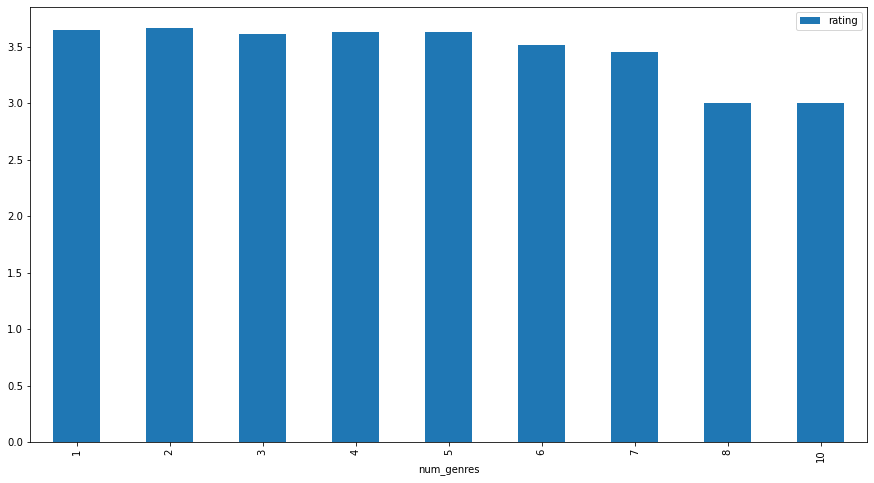

In [57]:
rated_films_df[['num_genres', 'rating']].groupby('num_genres').mean().plot.bar(figsize=(15, 8))

## Correlation between number of genders and rating, to check the previous conclusion

There is no significative negative correlation between the two variables. The real rating decreases start happening only after 5 genres per movie.

In [58]:
rated_films_df[['num_genres', "rating"]].corr()

num_genres    rating
num_genres    1.000000 -0.013366
rating       -0.013366  1.000000

In [59]:
# most common genres over the years 

films_genres_df.iloc[:,4:].sum().sort_values()

IMAX                    196
(no genres listed)      246
Film-Noir               330
Western                 676
Animation              1027
Musical                1036
Children               1139
War                    1194
Fantasy                1412
Mystery                1514
Sci-Fi                 1743
Adventure              2329
Documentary            2471
Horror                 2611
Crime                  2939
Action                 3520
Romance                4127
Thriller               4178
Comedy                 8374
Drama                 13344
dtype: int64

In [60]:
films_genres_df.head()

movieId                         title    year  \
0        1                    Toy Story   1995.0   
1        2                      Jumanji   1995.0   
2        3             Grumpier Old Men   1995.0   
3        4            Waiting to Exhale   1995.0   
4        5  Father of the Bride Part II   1995.0   

                                        genres  (no genres listed)  Action  \
0  Adventure|Animation|Children|Comedy|Fantasy                   0       0   
1                   Adventure|Children|Fantasy                   0       0   
2                               Comedy|Romance                   0       0   
3                         Comedy|Drama|Romance                   0       0   
4                                       Comedy                   0       0   

   Adventure  Animation  Children  Comedy  ...  Film-Noir  Horror  IMAX  \
0          1          1         1       1  ...          0       0     0   
1          1          0         1       0  ...          0       0     0   
2          0          0         0       1  ...          0       0     0   
3          0          0         0       1  ...          0       0     0   
4          0          0         0       1  ...          0       0     0   

   Musical  Mystery  Romance  Sci-Fi  Thriller  War  Western  
0        0        0        0       0         0    0        0  
1        0        0        0       0         0    0        0  
2        0        0        1       0         0    0        0  
3        0        0        1       0         0    0        0  
4        0        0        0       0         0    0        0  

[5 rows x 24 columns]

## Genres across the years

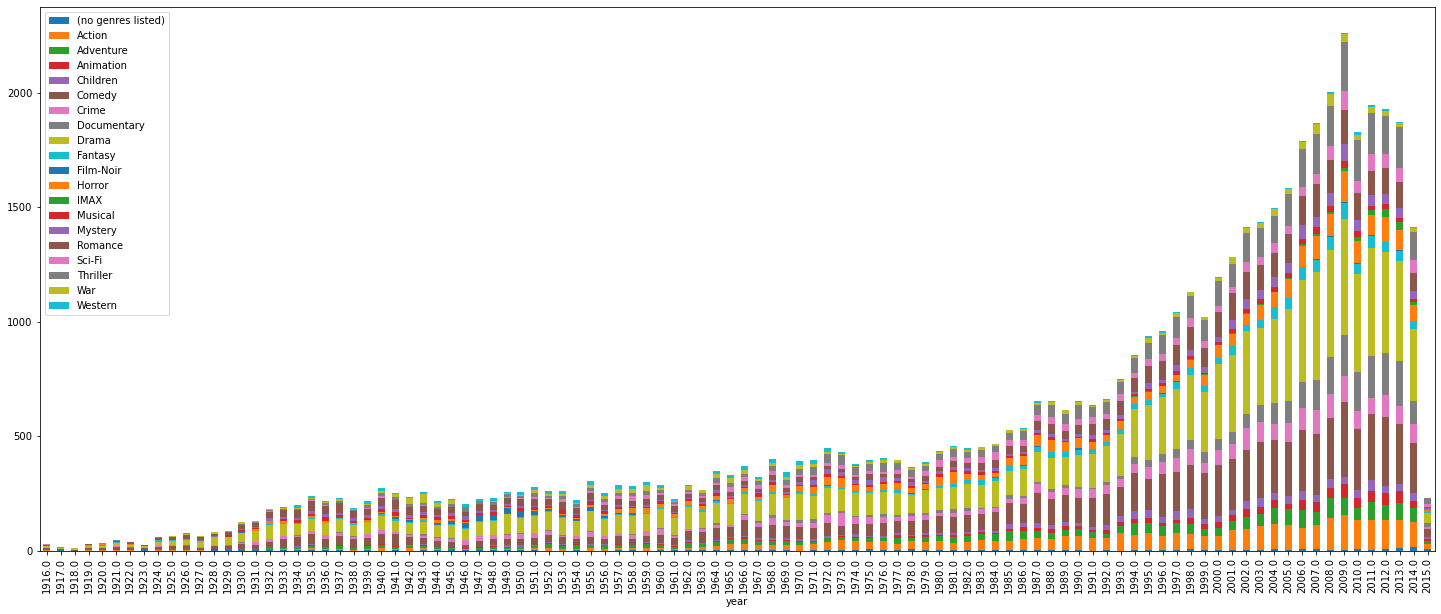

In [61]:
films_genres_df.groupby('year').sum().iloc[-100:,1:].plot.bar(stacked=True,figsize=(25, 10))

---

# 5. Additional variables

---

# 6. Conclusion and steps forward